In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data_path=r"https://drive.google.com/file/d/1MzVzC0y91LipBkrfynmDj4Vqvx9vSALQ/view?usp=sharing"
data_path='https://drive.google.com/uc?id=' + data_path.split('/')[-2]
df=pd.read_csv(data_path)

In [3]:
df.shape

(1460, 81)

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
missing_value_clm_20=[ 'Alley', 'FireplaceQu', 'PoolQC', 'Fence','MiscFeature']
df2_drop_clm=df.drop(columns=missing_value_clm_20)
df2_drop_clm.shape

(1460, 76)

In [6]:
df3_num=df2_drop_clm.select_dtypes(include=['int64','float64'])
df3_num.shape

(1460, 38)

In [7]:
df3_num.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

In [8]:
num_var_miss=['LotFrontage','MasVnrArea','GarageYrBlt']
df3_num[num_var_miss][df3_num[num_var_miss].isnull().any(axis=1)]

,LotFrontage,MasVnrArea,GarageYrBlt
7,NaN,240.0,1973.0
12,NaN,0.0,1962.0
14,NaN,212.0,1960.0
16,NaN,180.0,1970.0
24,NaN,0.0,1968.0
...,...,...,...
1443,NaN,0.0,1916.0
1446,NaN,189.0,1962.0
1449,21.0,0.0,NaN
1450,60.0,0.0,NaN


In [9]:
df['LotConfig'].unique()

array(['Inside', 'FR2', 'Corner', 'CulDSac', 'FR3'], dtype=object)

In [10]:
df[df.loc[:,'LotConfig']=="Inside"]["LotFrontage"].replace(np.nan,df[df.loc[:,'LotConfig']=="Inside"]["LotFrontage"].mean())

0       65.0
2       68.0
5       85.0
6       75.0
8       51.0
        ... 
1455    62.0
1456    85.0
1457    66.0
1458    68.0
1459    75.0
Name: LotFrontage, Length: 1052, dtype: float64

In [11]:
df_copy=df.copy()
for var_class in df['LotConfig'].unique():
    df_copy.update(df[df.loc[:,'LotConfig']=="Inside"]["LotFrontage"].replace(np.nan,df[df.loc[:,'LotConfig']=="Inside"]["LotFrontage"].mean()))

In [12]:
df_copy.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      125
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [13]:
df_copy=df.copy()
for var_class in df['LotConfig'].unique():
    df_copy.update(df[df.loc[:,'LotConfig']==var_class]["LotFrontage"].replace(np.nan,df[df.loc[:,'LotConfig']=="Inside"]["LotFrontage"].mean()))

In [14]:
df_copy.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [15]:
df_copy=df.copy()
num_vars_miss=['LotFrontage','MasVnrArea','GarageYrBlt']
cat_vars=['LotConfig','MasVnrType','GarageType']
for cat_vars, num_vars_miss in zip(cat_vars,num_vars_miss):
    for var_class in df[cat_vars].unique():
        df_copy.update(df[df.loc[:,cat_vars]==var_class][num_vars_miss].replace(np.nan,df[df.loc[:,cat_vars]==var_class][num_vars_miss].mean()))

In [16]:
df_copy[num_vars_miss].isnull().sum()

81

In [17]:
df_copy[df_copy[['MasVnrType']].isnull().any(axis=1)]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
234,235,60,RL,67.715686,7851,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500
529,530,20,RL,59.911111,32668,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624
650,651,60,FV,65.000000,8125,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950
936,937,20,RL,67.000000,10083,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900
973,974,20,FV,95.000000,11639,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000
977,978,120,FV,35.000000,4274,Pave,Pave,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2007,New,Partial,199900
1243,1244,20,RL,107.000000,13891,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000
1278,1279,60,RL,75.000000,9473,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2008,WD,Normal,237000


In [18]:
df_copy=df.copy()
num_vars_miss=['LotFrontage','MasVnrArea','GarageYrBlt']
cat_vars=['LotConfig','MasVnrType','LotShape']
for cat_vars, num_vars_miss in zip(cat_vars,num_vars_miss):
    for var_class in df[cat_vars].unique():
        df_copy.update(df[df.loc[:,cat_vars]==var_class][num_vars_miss].replace(np.nan,df[df.loc[:,cat_vars]==var_class][num_vars_miss].mean()))


In [19]:
df_copy[num_vars_miss].isnull().sum()

0

KeyError: 'G'

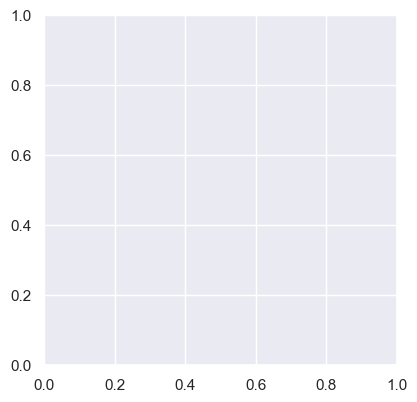

In [20]:
plt.figure(figsize=(10,10))
sns.set()
for i, var in enumerate(num_vars_miss):
    plt.subplot(2,2,i+1)
    sns.histplot(df[var],bins=25,kde_kws={'linewidth':8, 'color':'b'}, label='Original')
    sns.histplot(df_copy[var],bins=20,kde_kws={'linewidth':5, 'color':'r'}, label='Meanval')
    plt.legend()
    plt.legend()

In [ ]:
#median

In [21]:
df_copy_median=df.copy()
num_vars_miss=['LotFrontage','MasVnrArea','GarageYrBlt']
cat_vars=['LotConfig','MasVnrType','GarageType']
for cat_vars, num_vars_miss in zip(cat_vars,num_vars_miss):
    for var_class in df[cat_vars].unique():
        df_copy_median.update(df[df.loc[:,cat_vars]==var_class][num_vars_miss].replace(np.nan,df[df.loc[:,cat_vars]==var_class][num_vars_miss].median()))

In [22]:
df_copy_median[num_vars_miss].isnull().sum()

81